In [5]:
import numpy as np
import random
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from GMM import GMM

## Make a new random dataset

In [9]:
def gen_data(k=3, dim=2, points_per_cluster=200, lim=[-10, 10]):
    '''
    Generates data from a random mixture of Gaussians in a given range.
    Will also plot the points in case of 2D.
    input:
        - k: Number of Gaussian clusters
        - dim: Dimension of generated points
        - points_per_cluster: Number of points to be generated for each cluster
        - lim: Range of mean values
    output:
        - X: Generated points (points_per_cluster*k, dim)
    '''
    x = []
    mean = np.random.rand(k, dim)*(lim[1]-lim[0]) + lim[0]
    for i in range(k):
        cov = np.random.rand(dim, dim+10)
        cov = np.matmul(cov, cov.T)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
    x = np.array(x)
    if(dim == 2):
        fig = plt.figure()
        ax = fig.gca()
        ax.scatter(x[:,0], x[:,1], s=3, alpha=0.4)
        ax.autoscale(enable=True) 
    return x

In [10]:
def plot(title):
    '''
    Draw the data points and the fitted mixture model.
    input:
        - title: title of plot and name with which it will be saved.
    '''
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca()
    ax.scatter(X[:, 0], X[:, 1], s=3, alpha=0.4)
    ax.scatter(gmm.mu[:, 0], gmm.mu[:, 1], c=gmm.colors)
    gmm.draw(ax, lw=3)
    ax.set_xlim((-12, 12))
    ax.set_ylim((-12, 12))
    
    plt.title(title)
    plt.savefig(title.replace(':', '_'))
    plt.show()
    plt.clf()

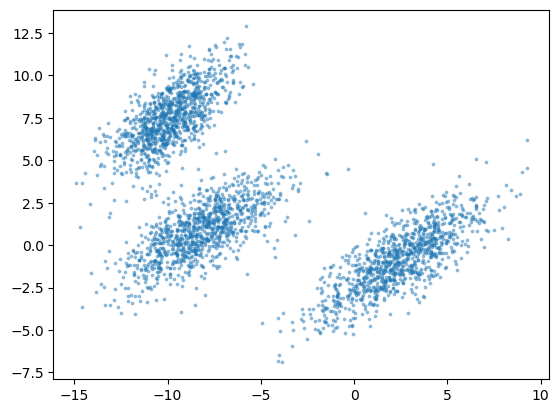

In [16]:
# Generate random 2D data with 3 clusters 
X = gen_data(k=3, dim=2, points_per_cluster=1000)

## EM Algorithm

In [17]:
# Create a Gaussian Mixture Model
gmm = GMM(3, 2)

Iteration: 1, log-likelihood: -15469.4106


<Figure size 640x480 with 0 Axes>

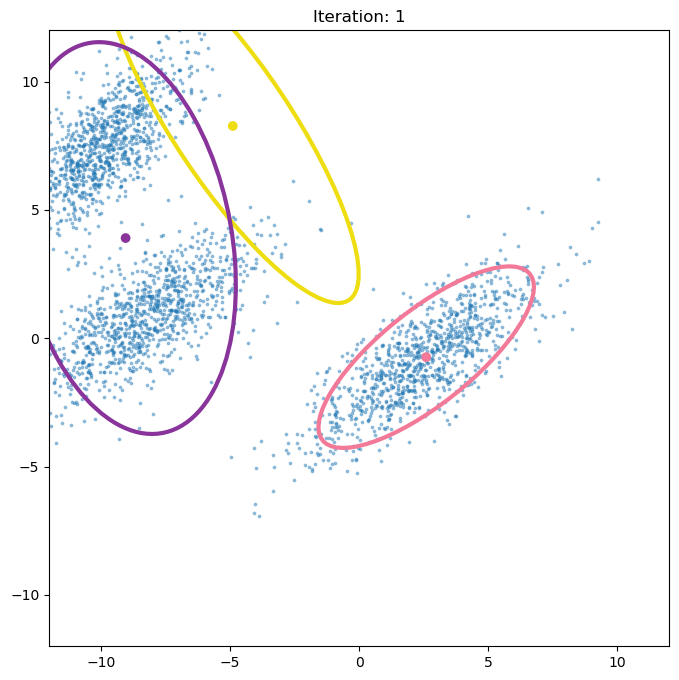

Iteration: 2, log-likelihood: -15429.5338


<Figure size 640x480 with 0 Axes>

Iteration: 3, log-likelihood: -15426.0062


<Figure size 640x480 with 0 Axes>

Iteration: 4, log-likelihood: -15424.1764


<Figure size 640x480 with 0 Axes>

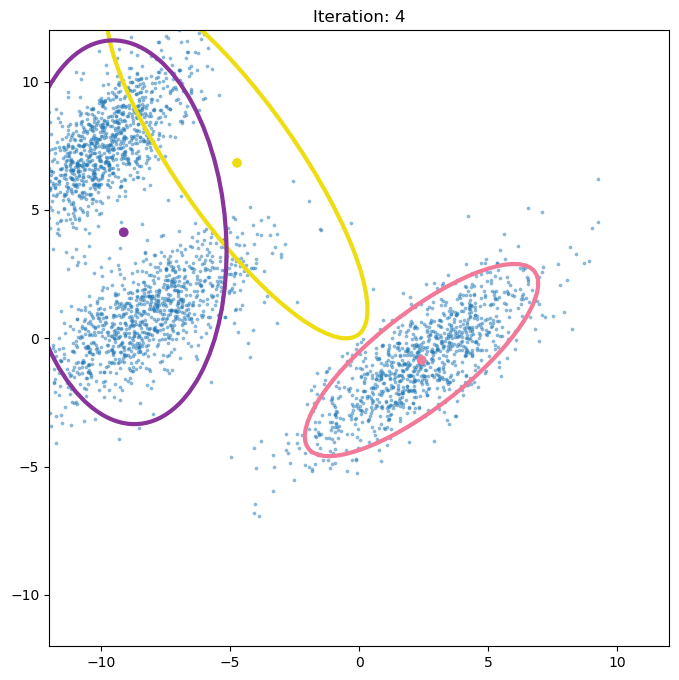

Iteration: 5, log-likelihood: -15422.7619


<Figure size 640x480 with 0 Axes>

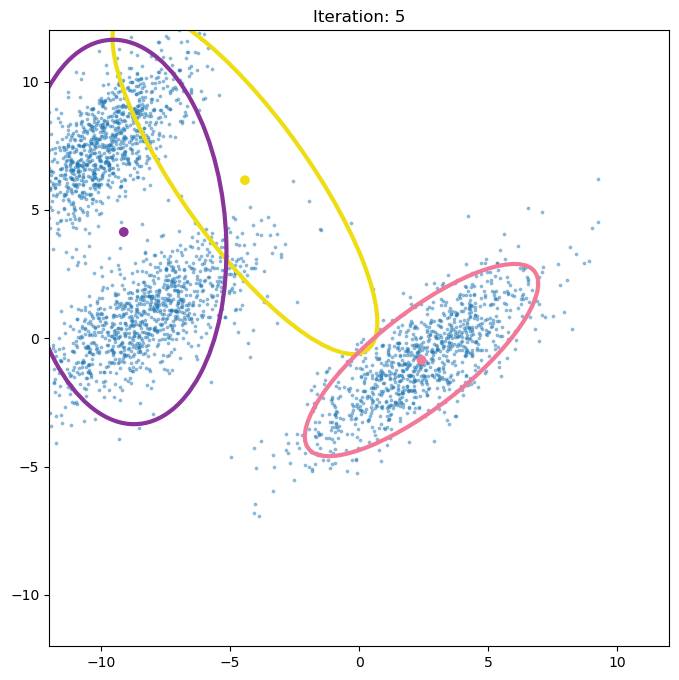

Iteration: 6, log-likelihood: -15421.5287


<Figure size 640x480 with 0 Axes>

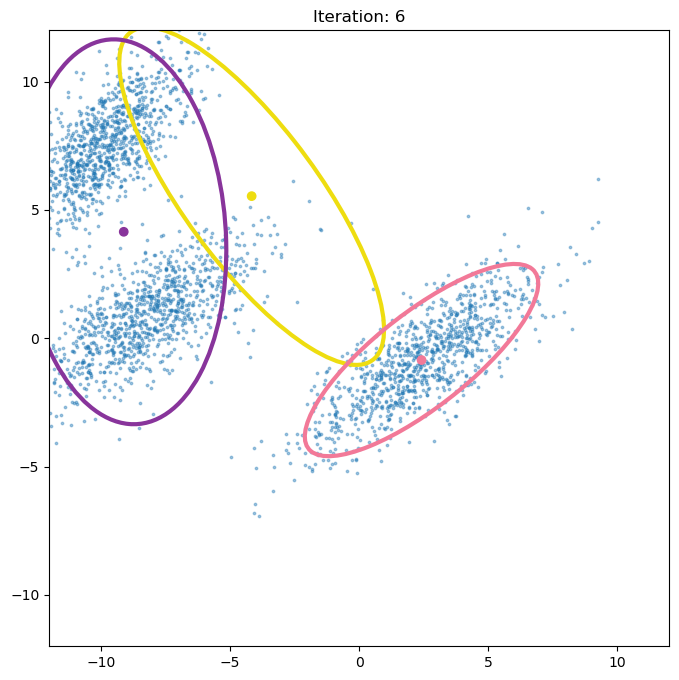

Iteration: 7, log-likelihood: -15420.2947


<Figure size 640x480 with 0 Axes>

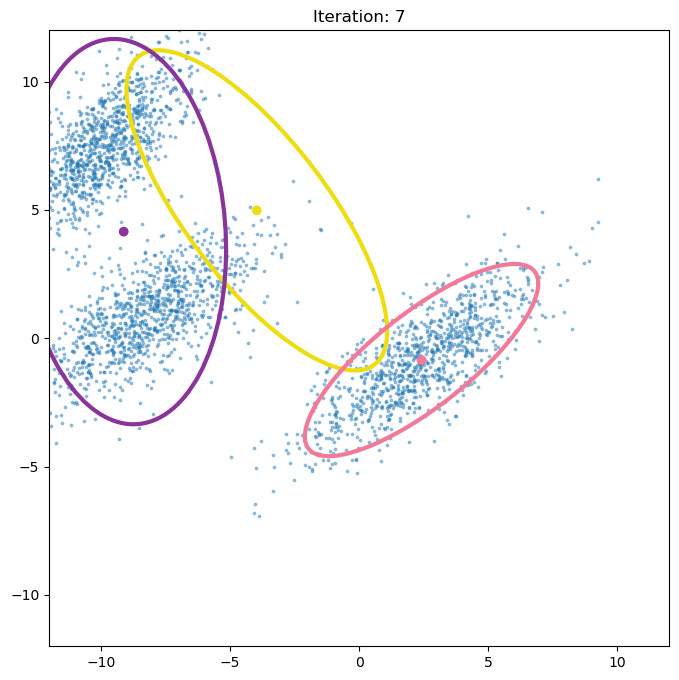

Iteration: 8, log-likelihood: -15418.8310


<Figure size 640x480 with 0 Axes>

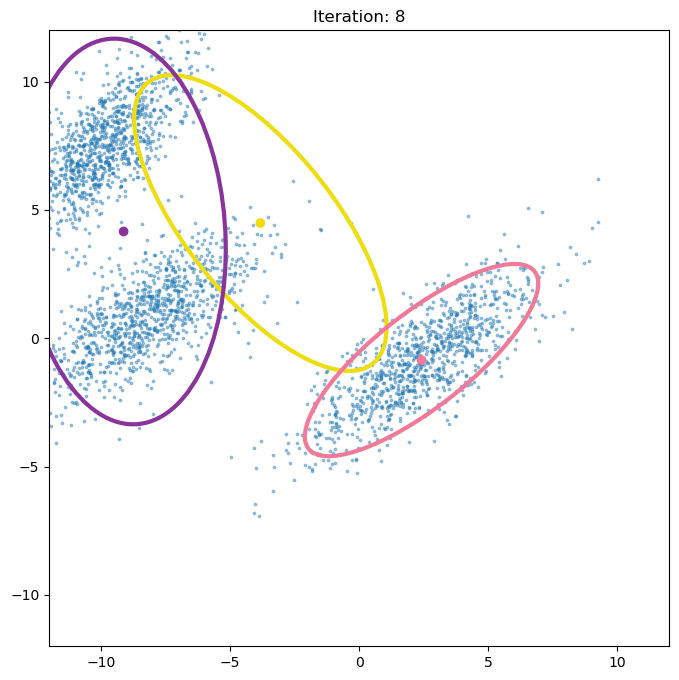

Iteration: 9, log-likelihood: -15416.6562


<Figure size 640x480 with 0 Axes>

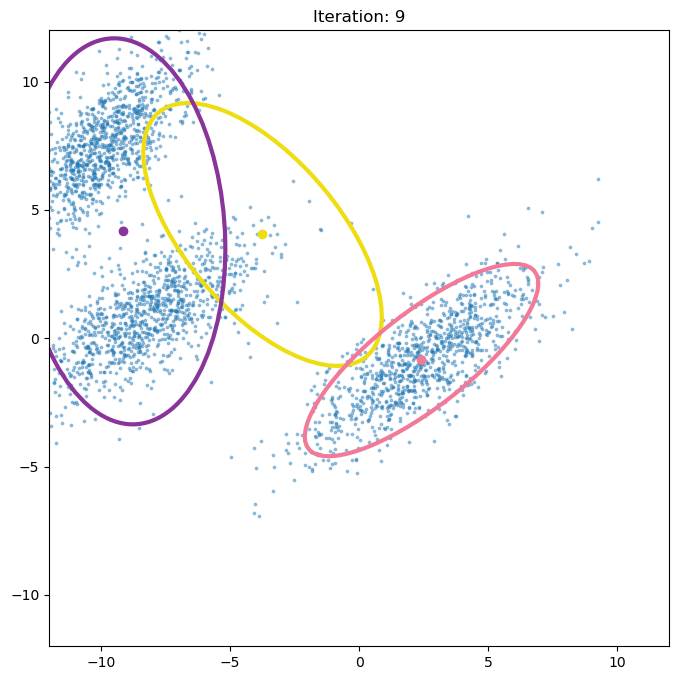

Iteration: 10, log-likelihood: -15412.2207


<Figure size 640x480 with 0 Axes>

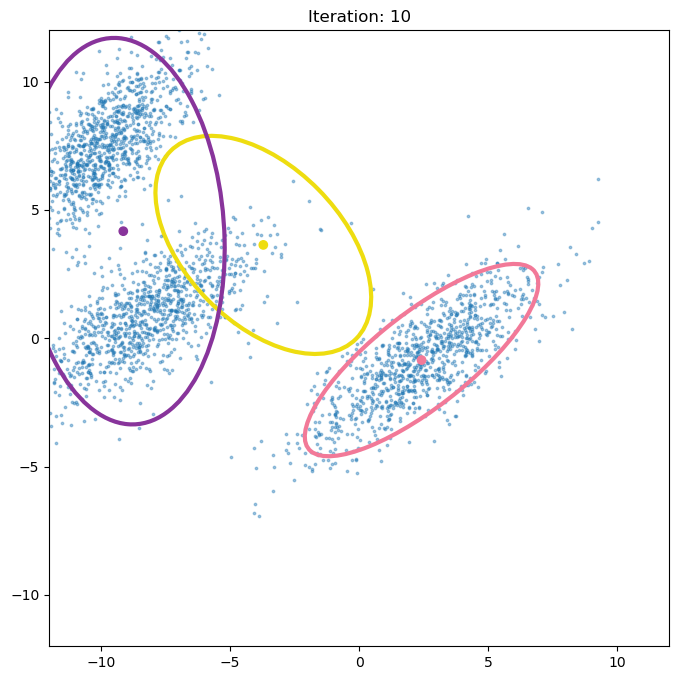

Iteration: 11, log-likelihood: -15400.3270


<Figure size 640x480 with 0 Axes>

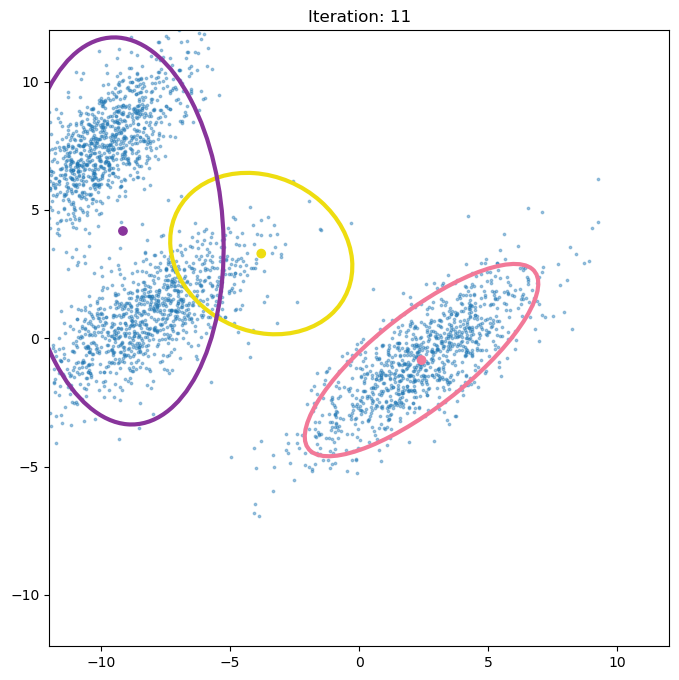

Iteration: 12, log-likelihood: -15376.7863


<Figure size 640x480 with 0 Axes>

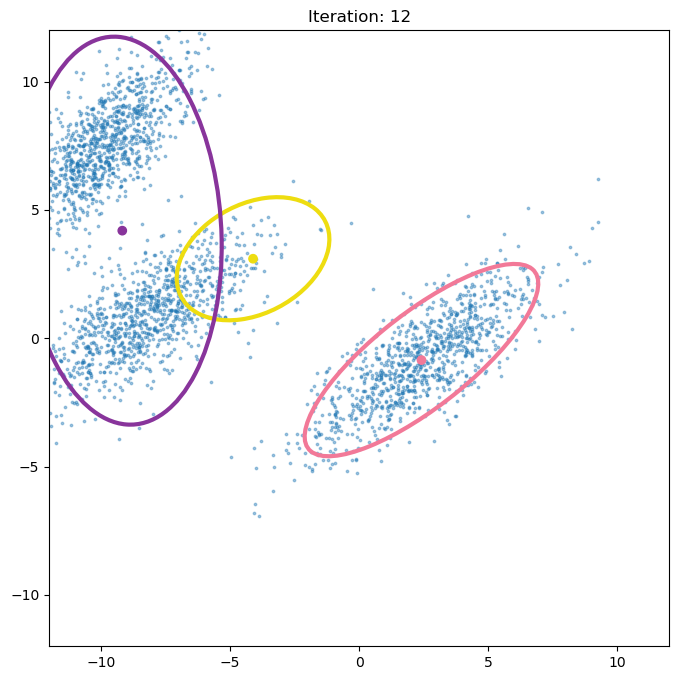

Iteration: 13, log-likelihood: -15349.1749


<Figure size 640x480 with 0 Axes>

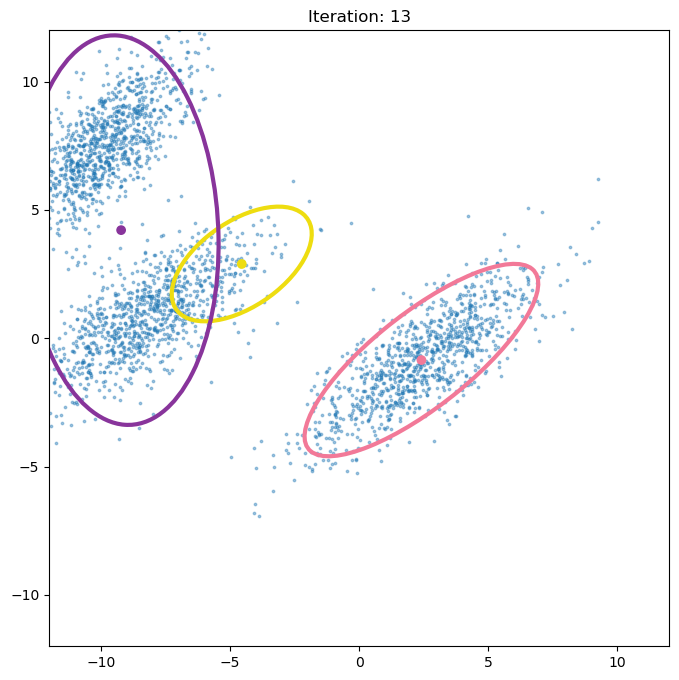

Iteration: 14, log-likelihood: -15318.6496


<Figure size 640x480 with 0 Axes>

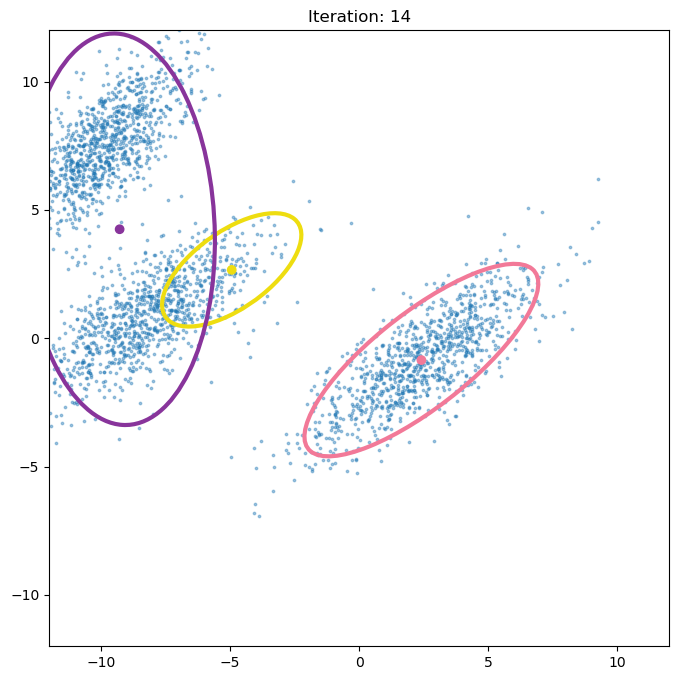

Iteration: 15, log-likelihood: -15283.2986


<Figure size 640x480 with 0 Axes>

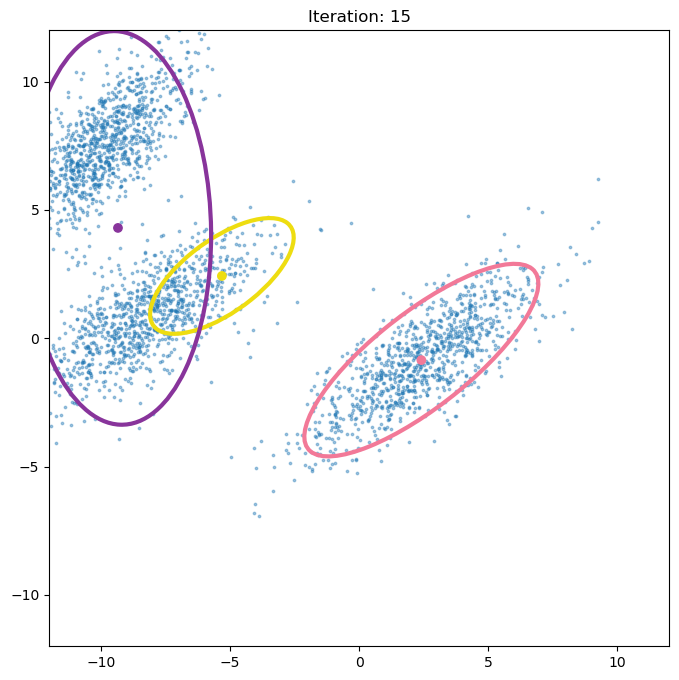

Iteration: 16, log-likelihood: -15241.2376


<Figure size 640x480 with 0 Axes>

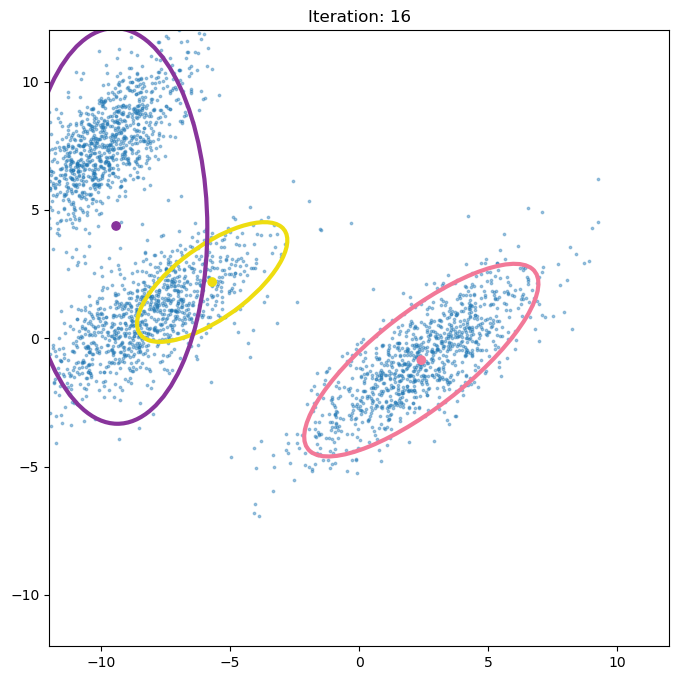

Iteration: 17, log-likelihood: -15192.3103


<Figure size 640x480 with 0 Axes>

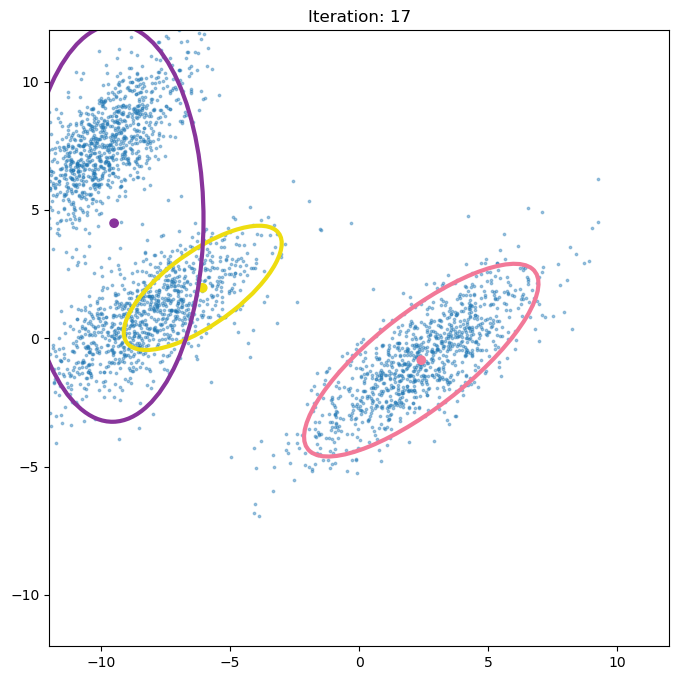

Iteration: 18, log-likelihood: -15137.7357


<Figure size 640x480 with 0 Axes>

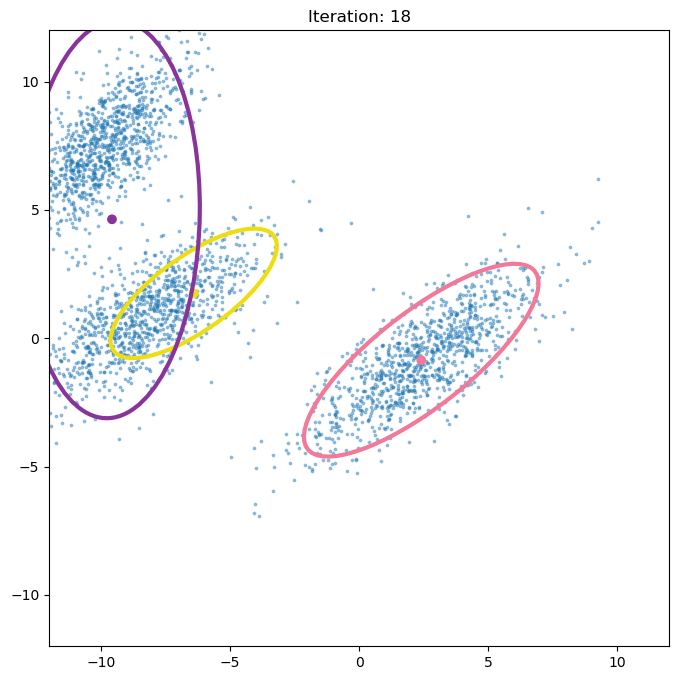

Iteration: 19, log-likelihood: -15079.3624


<Figure size 640x480 with 0 Axes>

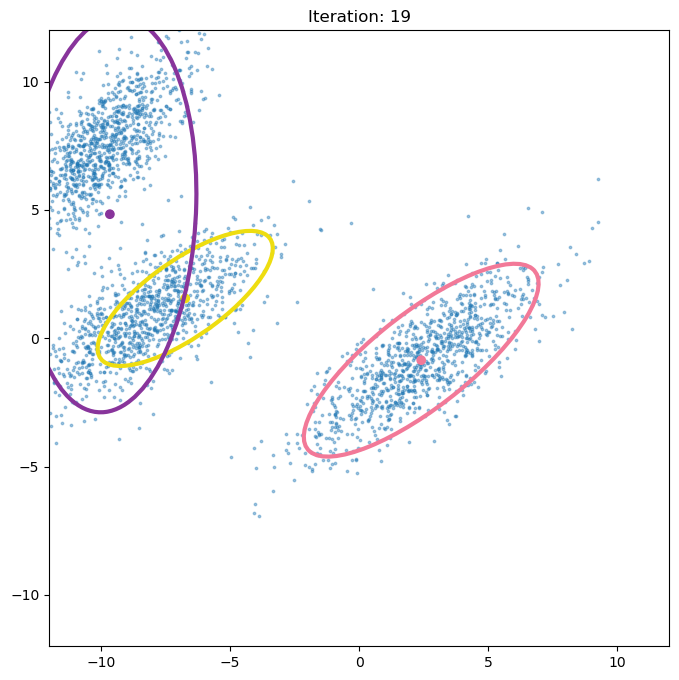

Iteration: 20, log-likelihood: -15018.9678


<Figure size 640x480 with 0 Axes>

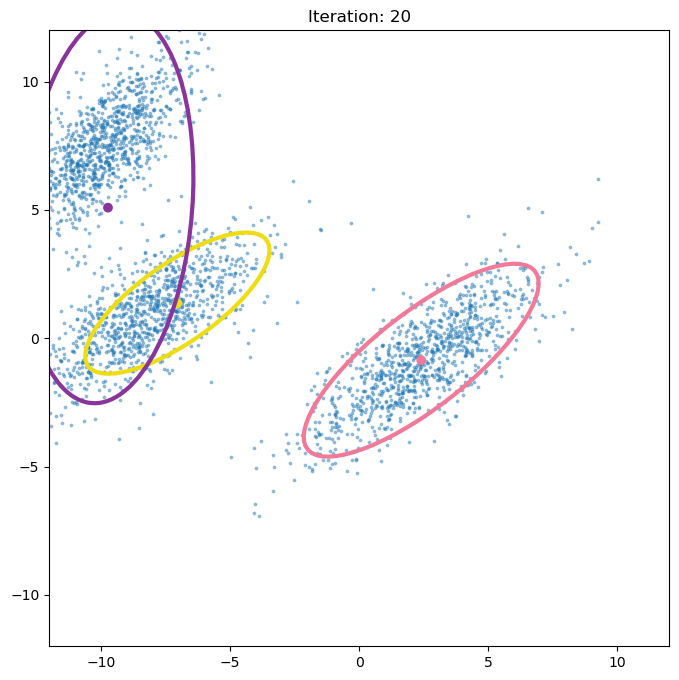

Iteration: 21, log-likelihood: -14957.1381


<Figure size 640x480 with 0 Axes>

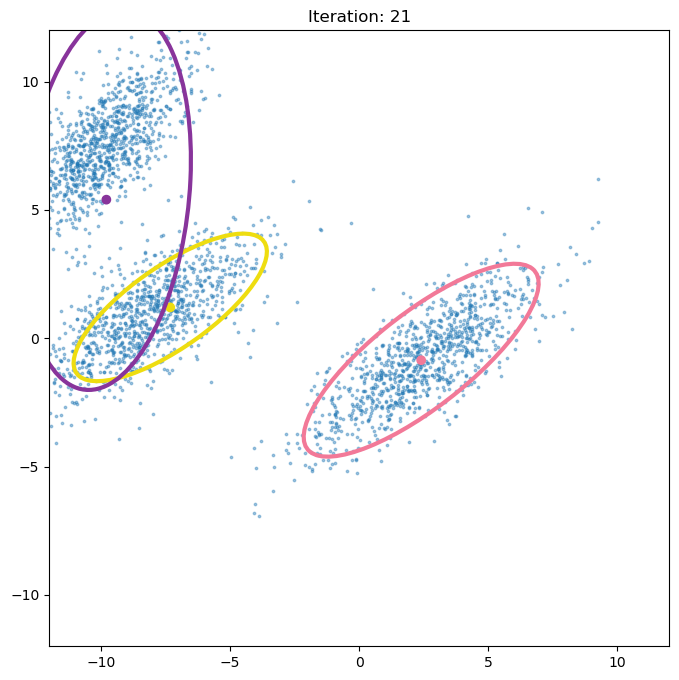

Iteration: 22, log-likelihood: -14891.1091


<Figure size 640x480 with 0 Axes>

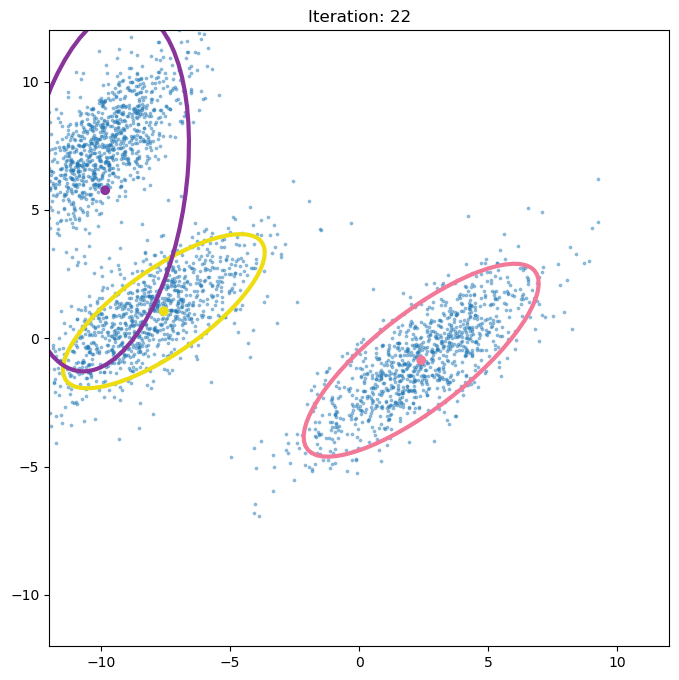

Iteration: 23, log-likelihood: -14811.1412


<Figure size 640x480 with 0 Axes>

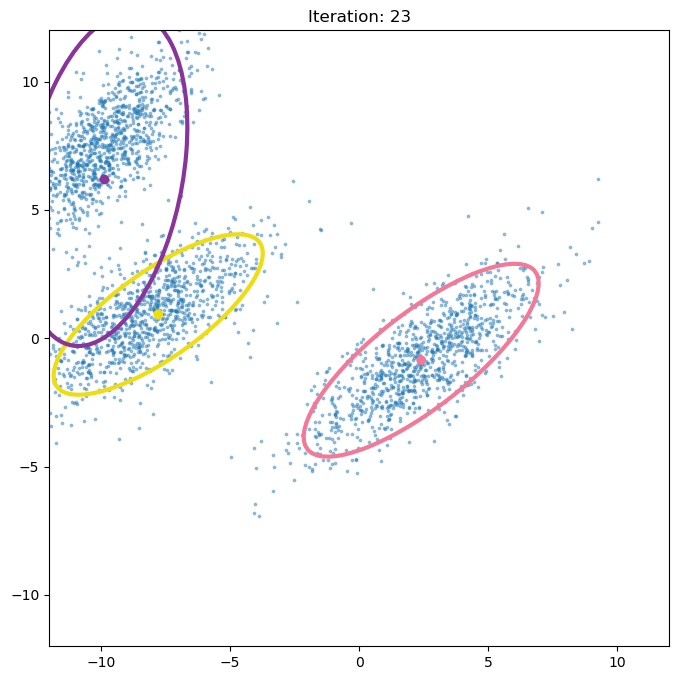

Iteration: 24, log-likelihood: -14692.5213


<Figure size 640x480 with 0 Axes>

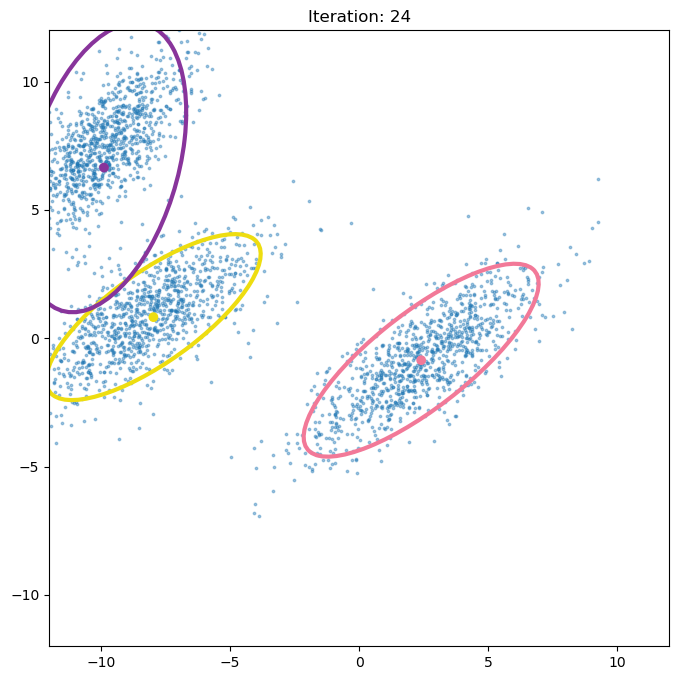

Iteration: 25, log-likelihood: -14506.8651


<Figure size 640x480 with 0 Axes>

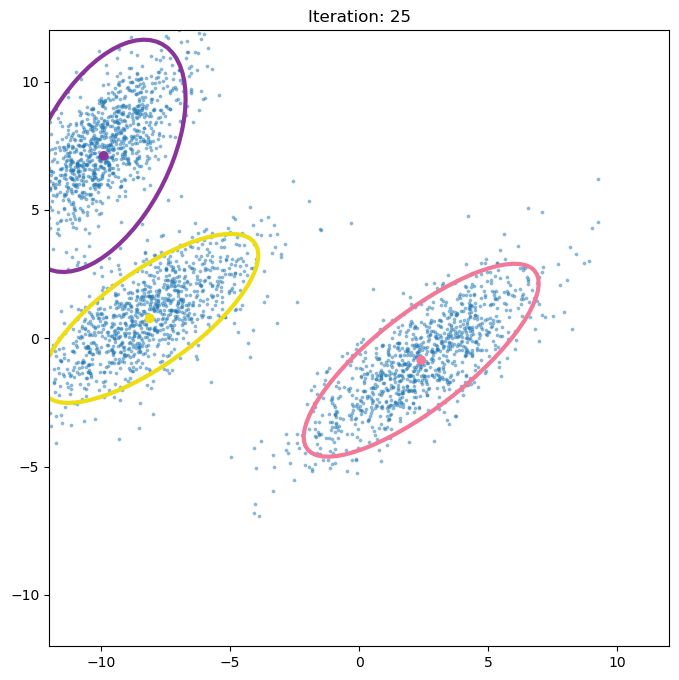

Iteration: 26, log-likelihood: -14358.8754


<Figure size 640x480 with 0 Axes>

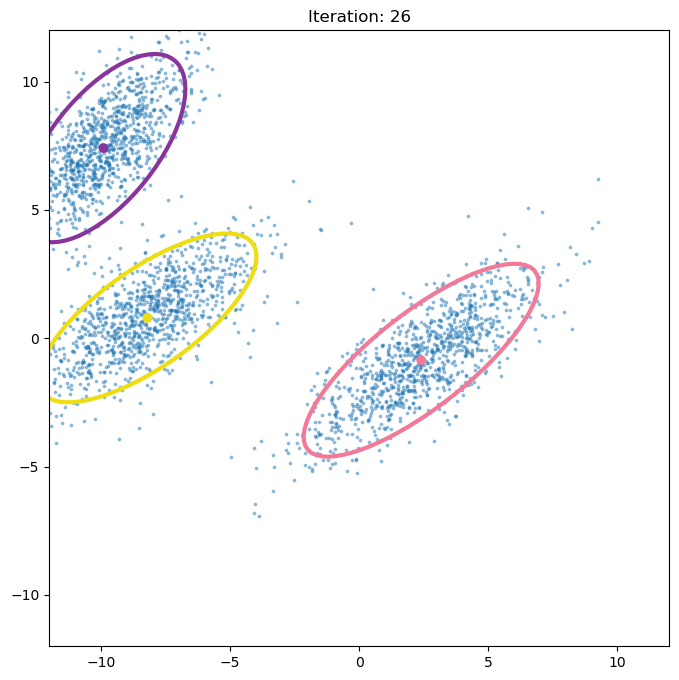

Iteration: 27, log-likelihood: -14338.5607


<Figure size 640x480 with 0 Axes>

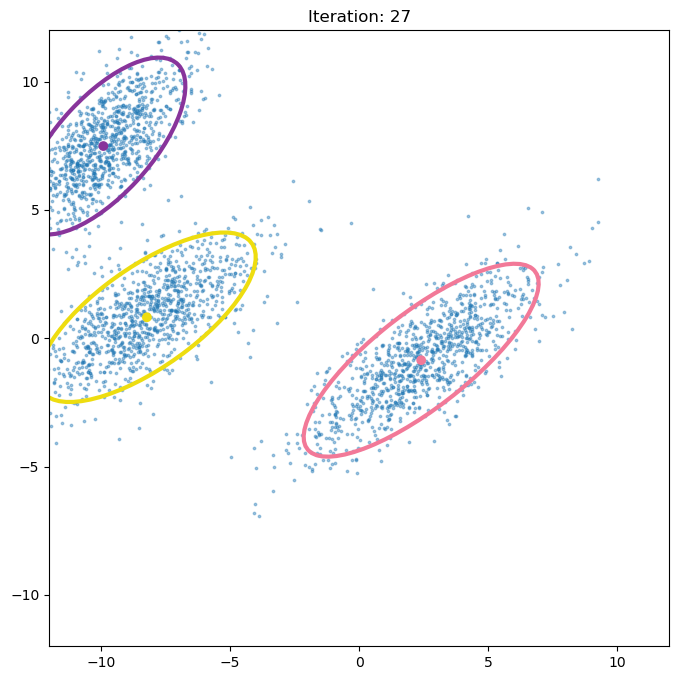

Iteration: 28, log-likelihood: -14337.6018


<Figure size 640x480 with 0 Axes>

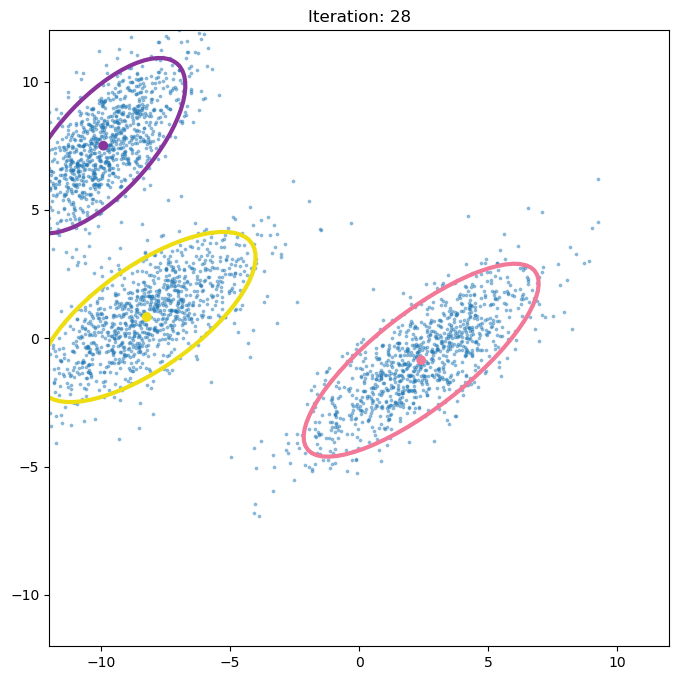

Iteration: 29, log-likelihood: -14337.5381


<Figure size 640x480 with 0 Axes>

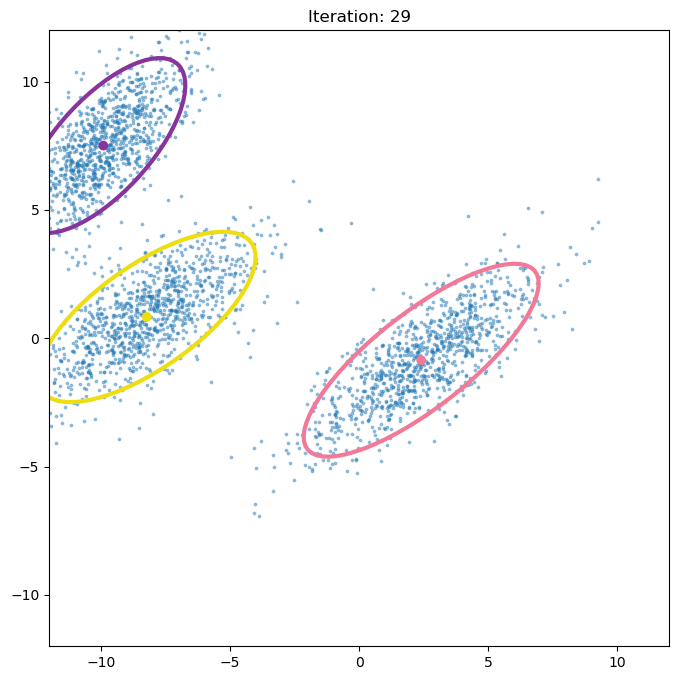

Iteration: 30, log-likelihood: -14337.5335


<Figure size 640x480 with 0 Axes>

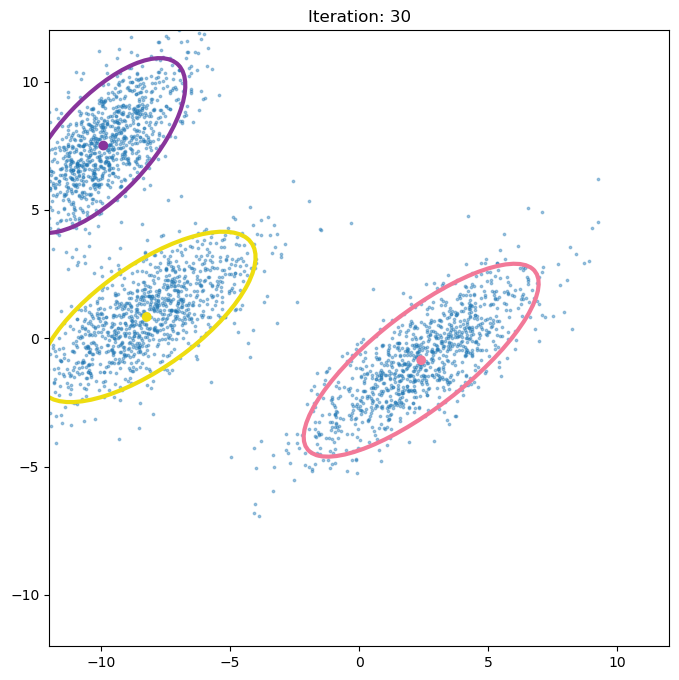

<Figure size 640x480 with 0 Axes>

In [18]:
# Training the GMM using EM

# Initialize EM algo with data
gmm.init_em(X)
num_iters = 30
# Saving log-likelihood
log_likelihood = [gmm.log_likelihood(X)]
# plotting
plot("Iteration:  0")
for e in range(num_iters):
    # E-step
    gmm.e_step()
    # M-step
    gmm.m_step()
    # Computing log-likelihood
    log_likelihood.append(gmm.log_likelihood(X))
    print("Iteration: {}, log-likelihood: {:.4f}".format(e+1, log_likelihood[-1]))
    # plotting
    plot(title="Iteration: " + str(e+1))

## Plot log-likelihood

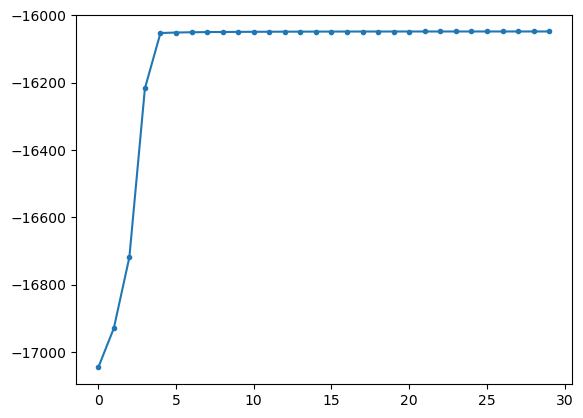

In [14]:
# Plot log-likelihood
plt.plot(log_likelihood[1:], marker='.')